# **Lending Club dataset**

In [4]:
# load necessary Python packages
import numpy as np
import pandas as pd
from scipy.stats import iqr as sc
pd.set_option('max_columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

**Load Data:**

### Data Structure: (supervised learning)


+ each row is a **sample**/record, ex: a customer
+ each column is an input variable/attribute/**feature**/predictor, ex: FICO score of a customer
  + with the exception of one column being the output **target**/label /prediction/"dependent variable"


**NumPy** and **pandas**, together support our data wrangling needs



In [43]:
# load the LendingClub dataset
loan = pd.read_csv('loan_data.csv')

#View First 25 Records
loan.head(25)

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


In [16]:
#Summary Statistics.
loan.agg(['mean','std','skew','median','max'])

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
mean,0.804970,NaN,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,NaN,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
skew,-1.539621,NaN,0.164420,0.912522,0.028668,0.023941,0.471260,1.155748,1.116106e+01,0.059985,3.584151,6.061793,5.126434,1.854592
median,1.000000,NaN,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
max,1.000000,small_business,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [19]:
loan.installment.max()

940.14

In [31]:
# How large is the dataset?
loan.shape

(9578, 20)

In [32]:
# Any missing data?
loan.isnull().sum()

credit_policy                 0
int_rate                      0
installment                   0
log_annual_inc                0
dti                           0
fico                          0
days_with_cr_line             0
revol_bal                     0
revol_util                    0
inq_last_6mths                0
delinq_2yrs                   0
pub_rec                       0
not_fully_paid                0
purpose_all_other             0
purpose_credit_card           0
purpose_debt_consolidation    0
purpose_educational           0
purpose_home_improvement      0
purpose_major_purchase        0
purpose_small_business        0
dtype: int64

**Potential Issues/Data Wrangling Notes:**
 

*   Target classes are heavily unbalanced(oversampling and/or undersampling.
*   Column "purpose" is categorical. Convert to dummies?
*   Input columns are of very different magnitudes. Normalize/standardize them?







* "normalize" --> [0,1] | "standardize" --> mean 0 and std 1.*



**LogisticRegression in scikit-learn package uses L2 regularization **



https://towardsdatascience.com/over-fitting-and-regularization-64d16100f45c

https://towardsdatascience.com/l1-and-l2-regularization-methods-ce25e7fc831c


# Data Wrangling

In [20]:
# Normalize/Standardize some input columns

loan['installment1000'] = loan.installment / 1000
loan.drop('installment', axis=1, inplace=True)

loan['fico_ratio'] = loan.fico / 850
loan.drop('fico', axis=1, inplace=True)

loan['decades_with_cr_line'] = loan.days_with_cr_line / 3650
loan.drop('days_with_cr_line', axis=1, inplace=True)

loan['log_revol_bal'] = np.log(loan.revol_bal + 1)
loan.drop('revol_bal', axis=1, inplace=True)

loan.revol_util = loan.revol_util / 100

In [21]:
# double check the resulting data
loan.agg(['mean','std','skew'])

,credit_policy,int_rate,log_annual_inc,dti,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment1000,fico_ratio,decades_with_cr_line,log_revol_bal
mean,0.804970,0.122640,10.932117,12.606679,0.467992,1.577469,0.163708,0.062122,0.160054,0.319089,0.836290,1.249525,8.612757
std,0.396245,0.026847,0.614813,6.883970,0.290144,2.200245,0.546215,0.262126,0.366676,0.207071,0.044671,0.684091,2.173318
skew,-1.539621,0.164420,0.028668,0.023941,0.059985,3.584151,6.061793,5.126434,1.854592,0.912522,0.471260,1.155748,-2.213951


In [22]:
loan.int_rate.agg(['max','mean','std'])

max     0.216400
mean    0.122640
std     0.026847
Name: int_rate, dtype: float64

https://scikit-learn.org/stable/modules/preprocessing.html

## Convert column "purpose" to dummies

In [28]:
# What are the possible values in column "purpose"? 
loan.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [29]:
# create the dummies
loan = pd.get_dummies(loan, columns=['purpose'])
loan.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [ ]:
# drop one of the dummies 
loan.drop('purpose_debt_consolidation', axis=1, inplace=True)
loan.head()

,credit_policy,int_rate,log_annual_inc,dti,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,installment1000,fico_ratio,decades_with_cr_line,log_revol_bal,purpose_all_other,purpose_credit_card,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,11.350407,19.48,0.521,0,0,0,0,0.82910,0.867059,1.545194,10.270039,0,0,0,0,0,0
1,1,0.1071,11.082143,14.29,0.767,0,0,0,0,0.22822,0.831765,0.756164,10.422995,0,1,0,0,0,0
2,1,0.1357,10.373491,11.63,0.256,1,0,0,0,0.36686,0.802353,1.290411,8.163941,0,0,0,0,0,0
3,1,0.1008,11.350407,8.10,0.732,1,0,0,0,0.16234,0.837647,0.739715,10.424303,0,0,0,0,0,0
4,1,0.1426,11.299732,14.97,0.395,0,1,0,0,0.10292,0.784706,1.113973,8.464003,0,1,0,0,0,0


(why?): 

## Deal with unbalanced data


"Unbalanced"- causes a trained model to completely ignore some possible values of a target

In [30]:
# how many records have not_fully_paid being 0? being 1?
loan.not_fully_paid.value_counts()

# What percentage of borrowers default?
loan.not_fully_paid.mean()

0.16005429108373356

### LendingClub Dataset : 

Highly **unbalanced**: the proportions of all possible values (classes) of the target variable are far too different. alogirthms typically default to "majority class" therefor creating bias

There are two solutions when the data is highly unbalanced:
+ **Option 1. Re-sampling the data to make it balanced.** 
  + undersampling the majority class
    + this is the usual choice when we have large enough data
  + oversampling the minority class
    + it may cause the data leakage problem, (avoid unless the data size is too small)
+ **Option 2. Do not use "accuracy" as the performance metric.** Instead, 
  + use alternative metrics that can give different weight to different classes of the target, ex: counts '1' more heavily than '0' in the target of the LendingClub dataset

In [33]:
# separate the classes, where we already know 'not_fully_paid==0' is the majority class
loan_0 = loan[loan.not_fully_paid==0]
loan_1 = loan[loan.not_fully_paid==1]

# remember the sizes of the two classes
n_majority_class = loan_0.shape[0]
n_minority_class = loan_1.shape[0]
print(f"The majority class contains {n_majority_class} records. \nThe minority class contains {n_minority_class} records. ")

The majority class contains 8045 records. 
The minority class contains 1533 records. 


### Undersampling the majority class

The function for this is `sklearn.utils.resample()`.

In [34]:
from sklearn.utils import resample

In [35]:
# undersample the majority class
loan_0_undersampled = resample(loan_0, replace=False,
                              n_samples=n_minority_class, random_state=1234)
loan_0_undersampled.shape

(1533, 20)

### Combine the two classes into a single (resampled) train dataset

In [36]:
loan_balanced = pd.concat([loan_0_undersampled, loan_1])
loan_balanced.not_fully_paid.value_counts()

0    1533
1    1533
Name: not_fully_paid, dtype: int64

In [37]:
## save the (balanced) train data and the (unbalanced) test data for future use
loan_balanced.to_csv(path + 'loan_balanced.csv', index=False)


### Comments: 

make sure you do `train_test_split()` *before* oversampling (why?)
+ Other oversampling methods :
  + [bootstrapping](https://en.wikipedia.org/wiki/Bootstrapping_(statistics)), a.k.a. `resample()` with the option `replace=True`.
  + [`imblearn.over_sampling.SMOTE`](https://imbalanced-learn.org/stable/over_sampling.html) -- a k-NN inspired method to create synthetic records

### Split the data into train and test

In [45]:
X = loan.drop(columns=['purpose'])
y = loan['purpose']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                               test_size=0.25, # reserve 20% data for testing
                               stratify=y, # use stratified sampling
                               random_state=4321)

Now let's see whether and how data wrangling we just did affects the eventual prediction performance. Let's again use logistic regression.

## Logistic regression on the balanced data

In [47]:
# Step 1: determine the hyperparameter values of algorith
model = LogisticRegression(penalty='none', max_iter=1000, random_state=1)

In [48]:
# Step 2: feed the train dataset into the learning algorithm to get the trained model (i.e., the algorithm)
model.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=1000, penalty='none', random_state=1)

In [49]:
#Coefficients of the trained model:
logit_reg_coef = pd.DataFrame(model.coef_[0],index=X_train.columns,columns=['Coef'])
logit_reg_coef

,Coef
credit_policy,-0.000022
int_rate,-0.000002
installment,-0.001361
log_annual_inc,0.000011
dti,-0.001289
fico,0.002158
days_with_cr_line,-0.000022
revol_bal,0.000007
revol_util,-0.003616
inq_last_6mths,0.000088


In [50]:
# evaluation
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

The accuracy is: 44.63%
The confusion matrix is:
[[216   3 364   0   0   0   0]
 [ 46   0 270   0   0   0   0]
 [133   4 852   0   0   0   0]
 [ 41   0  45   0   0   0   0]
 [ 48   1 107   0   0   0   1]
 [ 41   0  68   0   0   0   0]
 [ 24   1 129   0   0   0   1]]


# **Machine Learning**


# Improving Supervised Learning thorugh Model Analytics  and other Performance Metrics



+ There are many learning algorithms to choose from
+ For each learning algorithm, there are usually many hyperparameters to set, the choices of which may result in different trained models

**There is no sure choice that dominates all other choices.Try multiple learning algorithms, and multiple possible values of the hyperparameters for each learning algorithm. We then compare them to select the champion model.



In [51]:
# load necessary Python packages
import numpy as np
import pandas as pd
pd.set_option('max_columns', 100)

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [52]:
loan_balanced = pd.read_csv('/content/loan_data.csvloan_balanced.csv')
loan_balanced.head()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,182.41,10.849415,18.45,697,3419.958333,11812,67.9,1,0,0,0,1,0,0,0,0,0,0
1,0,0.1380,61.35,9.852194,3.85,682,959.958333,1279,85.3,0,0,0,0,0,0,0,1,0,0,0
2,1,0.1136,798.10,11.728037,13.73,727,5070.000000,28237,59.7,0,0,0,0,0,0,1,0,0,0,0
3,1,0.1191,87.91,10.516861,19.77,677,4559.958333,10679,55.3,1,0,1,0,0,0,1,0,0,0,0
4,0,0.1600,175.79,10.668862,13.12,682,810.041667,2754,34.4,2,0,0,0,1,0,0,0,0,0,0


In [53]:
# Separate the feature matrix and target array. Then, split train and test
X = loan_balanced.drop(columns=['not_fully_paid'])
y = loan_balanced['not_fully_paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                               test_size=0.2, # reserve 20% data for testing
                               stratify=y, # use stratified sampling
                               random_state=1)

In [54]:
# Logistic regression model
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(penalty='none', max_iter=1000, random_state=1)
model_LR.fit(X_train,y_train)

y_predict = model_LR.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_LR = accuracy
cm_LR = cm

The accuracy is: 59.77%
The confusion matrix is:
[[184 123]
 [124 183]]


In [55]:
# Decision tree model 
from sklearn.tree import DecisionTreeClassifier

In [56]:
from sklearn.tree import DecisionTreeClassifier

model_DT = DecisionTreeClassifier(random_state=1)
model_DT.fit(X_train,y_train)

y_predict = model_DT.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_DT = accuracy
cm_DT = cm

The accuracy is: 54.56%
The confusion matrix is:
[[171 136]
 [143 164]]


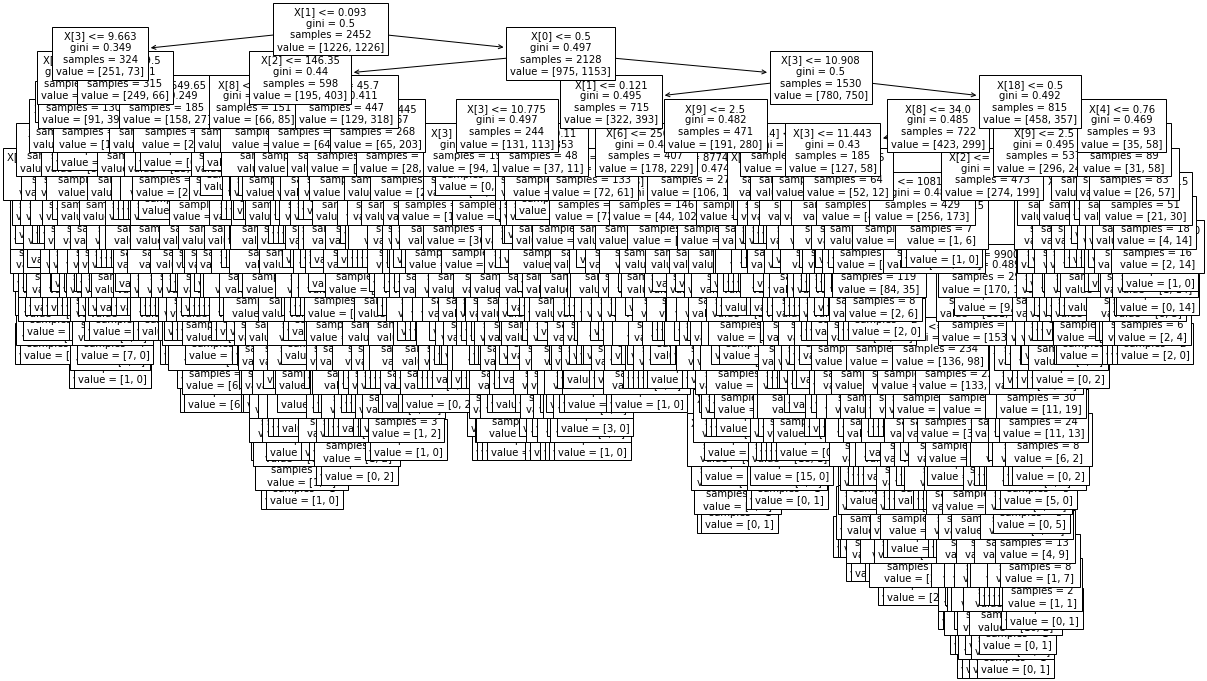

In [57]:
#Plot Tree
# warning: limit the max_depth before you plot the tree

from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,12))  # set plot size (denoted in inches)
tree.plot_tree(model_DT,fontsize=10)
plt.show()

In [58]:
#Random Forrest 

from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(random_state=1)
model_RF.fit(X_train,y_train)

y_predict = model_RF.predict(X_test)

accuracy = accuracy_score(y_test, y_predict).round(4)
print(f"The accuracy is: {(accuracy*100).round(4)}%")
print("The confusion matrix is:")
cm = confusion_matrix(y_test, y_predict)
print(cm)

# save the results for later comparison
accuracy_RF = accuracy
cm_RF = cm

The accuracy is: 59.77%
The confusion matrix is:
[[185 122]
 [125 182]]


In [59]:
#RandomForestClassifier tells the relative importance of all input variables:
importances = model_RF.feature_importances_
pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

int_rate                      0.119417
installment                   0.108578
log_annual_inc                0.106805
revol_util                    0.106580
days_with_cr_line             0.106253
dti                           0.103998
revol_bal                     0.102884
fico                          0.085057
inq_last_6mths                0.053272
credit_policy                 0.021311
delinq_2yrs                   0.013481
purpose_debt_consolidation    0.012421
purpose_all_other             0.011834
purpose_credit_card           0.010684
purpose_small_business        0.010540
pub_rec                       0.008946
purpose_home_improvement      0.006188
purpose_major_purchase        0.005948
purpose_educational           0.005801
dtype: float64

## Metrics besides accuracy for comparing the trained models



In [60]:
loan_balanced


,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,182.41,10.849415,18.45,697,3419.958333,11812,67.9,1,0,0,0,1,0,0,0,0,0,0
1,0,0.1380,61.35,9.852194,3.85,682,959.958333,1279,85.3,0,0,0,0,0,0,0,1,0,0,0
2,1,0.1136,798.10,11.728037,13.73,727,5070.000000,28237,59.7,0,0,0,0,0,0,1,0,0,0,0
3,1,0.1191,87.91,10.516861,19.77,677,4559.958333,10679,55.3,1,0,1,0,0,0,1,0,0,0,0
4,0,0.1600,175.79,10.668862,13.12,682,810.041667,2754,34.4,2,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3061,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1,1,0,0,0,0,0,0
3062,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1,1,0,0,0,0,0,0
3063,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1,0,0,1,0,0,0,0
3064,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1,0,0,0,0,1,0,0


LogisticRegression classifier produces record-by-record binary predictions via its `predict()` method, and produces record-by-record probability estimates via its `predict_proba()` method

In [61]:
#LR result example: 

y_predict = model_LR.predict(X_test)
y_predict_proba = model_LR.predict_proba(X_test)

record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba':y_predict_proba[:,1]})
record_level_predictions

,y_test,y_predict,y_predict_proba
0,0,0,0.328244
1,0,1,0.539388
2,1,1,0.560835
3,1,1,0.545856
4,0,1,0.502573
...,...,...,...
609,1,1,0.507848
610,0,0,0.488587
611,1,1,0.523695
612,1,0,0.470278


In [62]:
#RF result example: 

y_predict = model_RF.predict(X_test)
y_predict_proba = model_RF.predict_proba(X_test)

record_level_predictions = pd.DataFrame({'y_test':y_test.to_numpy(),
                                         'y_predict':y_predict,
                                         'y_predict_proba':y_predict_proba[:,1]})
record_level_predictions

,y_test,y_predict,y_predict_proba
0,0,0,0.20
1,0,1,0.62
2,1,0,0.44
3,1,1,0.60
4,0,1,0.72
...,...,...,...
609,1,0,0.48
610,0,1,0.61
611,1,1,0.51
612,1,0,0.40


### Accuracy vs Confusion Matrix

Comparing the ground truth, "y_test", with the predicted value, "y_predict"
+ accuracy (number of records where y_test == y_predict) / (total number of records)
+ confusion matrix:

<table>
  <tr>
    <th></th>
    <th>y_predict==0</th>
    <th>y_predict==1</th>
  </tr>
  <tr>
    <th>y_test==0</th>
    <th>number of TN (true negatives)</th>
    <th>number of FP (false positives)</th>
  </tr>
  <tr>
    <th>y_test==1</th>
    <th>number of FN (false negatives)</th>
    <th>number of TP (true positives)</th>
  </tr>
</table>

In [63]:
cm_DT

array([[171, 136],
       [143, 164]])

In [64]:
cm_LR

array([[184, 123],
       [124, 183]])

In [65]:
model_LR

LogisticRegression(max_iter=1000, penalty='none', random_state=1)

# roc_auc_score

"roc" stands for the Receiver Operating Characteristic (ROC) Curve
"auc" stands for "Area Under the ROC Curve"

roc_auc_score(y_test, y_predict_proba) computes the size of the area under the ROC curve. Value between 0.5 and 1. A larger number means better model performance.

In [66]:
from sklearn.metrics import roc_auc_score

In [67]:
roc_auc_score(y_test, y_predict_proba[:,1])


0.6653333191864105

# **Creating customized metrics to fit business problem**

Suppose that LendingClub company plans to contact all borrowers predicted to default. The cost of contacting a borrower is \$1. If contacted, and if the borrower indeed planned to default (a.k.a. a true positive, or TP, case), this contact may change the borrower's mind. Suppose that this possible change of mind, on average, can save LendingClub \$6 per case of TP. 

Question: how much money LendingClub can save in the scenario shown in confusion matrix `cm_LR`?

In [68]:
def my_custom_profit_function(cm):
  return cm[1,1]*5-cm[0,1]*1

In [69]:
print("The savings from adopting the logistic regression model, the decision tree model, and the random forest model are, respectively:")
print(f"${my_custom_profit_function(cm_LR)}, ${my_custom_profit_function(cm_DT)}, ${my_custom_profit_function(cm_RF)}.")

The savings from adopting the logistic regression model, the decision tree model, and the random forest model are, respectively:
$792, $684, $788.
